In [1]:
import sys, numpy
print(sys.executable)
print(numpy.__version__)


/opt/anaconda3/envs/fetalml/bin/python
1.26.4


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("fetal_health.csv")
print(df.shape)
df.head()

(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.info()
df.describe().T

<class 'pandas.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability             

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [4]:
target_col = "fetal_health"
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

print("Classes:", sorted(y.unique()))
print("Class counts:\n", y.value_counts())

Classes: [1, 2, 3]
Class counts:
 fetal_health
1    1655
2     295
3     176
Name: count, dtype: int64


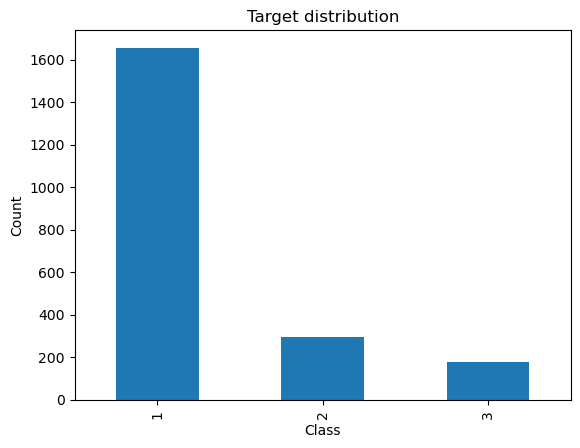

In [5]:
plt.figure()
y.value_counts().sort_index().plot(kind="bar")
plt.title("Target distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

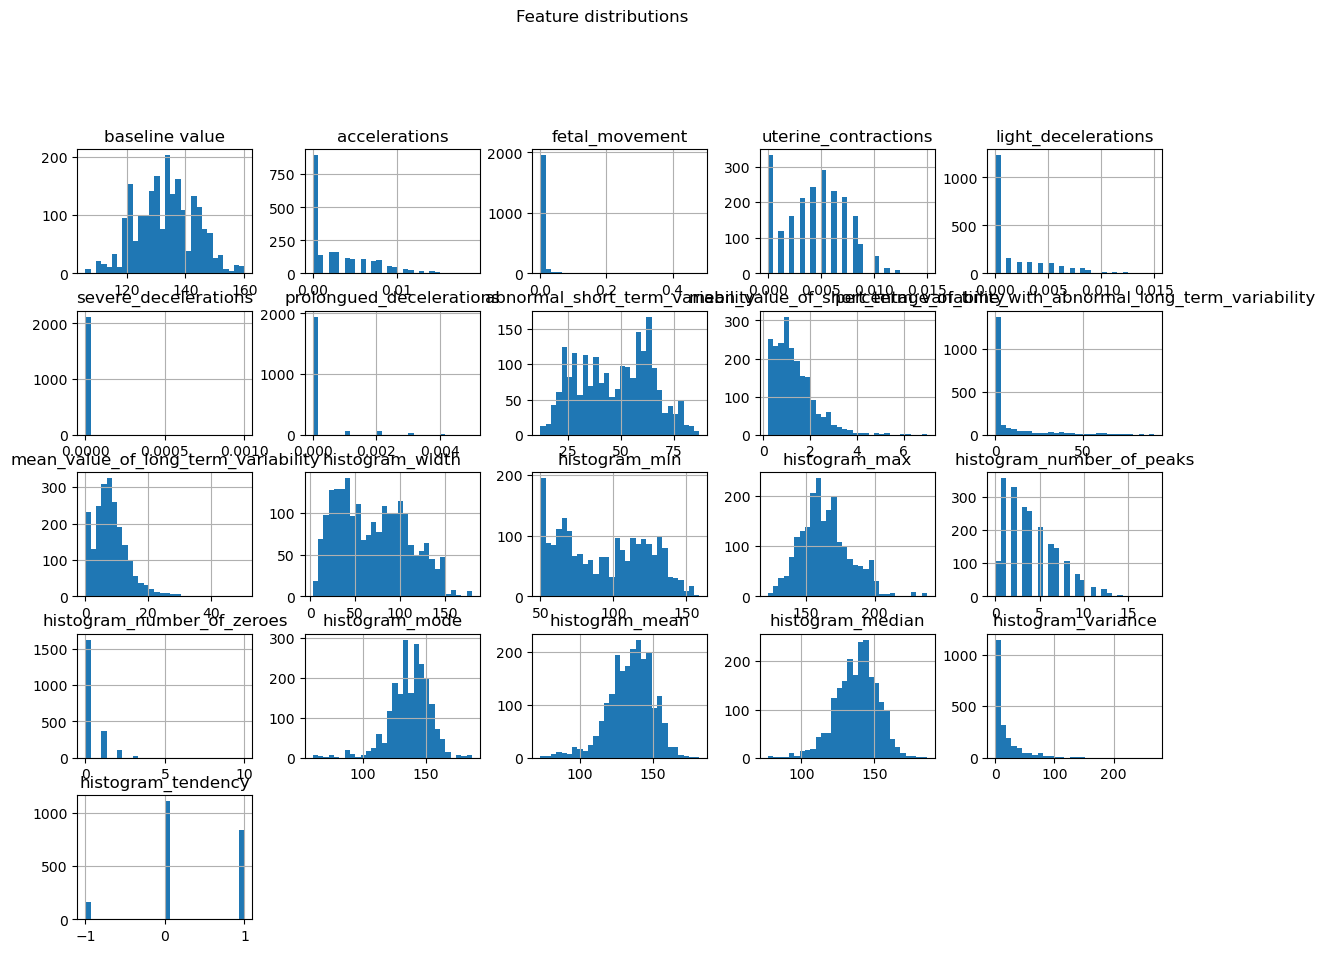

In [6]:
X.hist(figsize=(14, 10), bins=30)
plt.suptitle("Feature distributions", y=1.02)
plt.show()

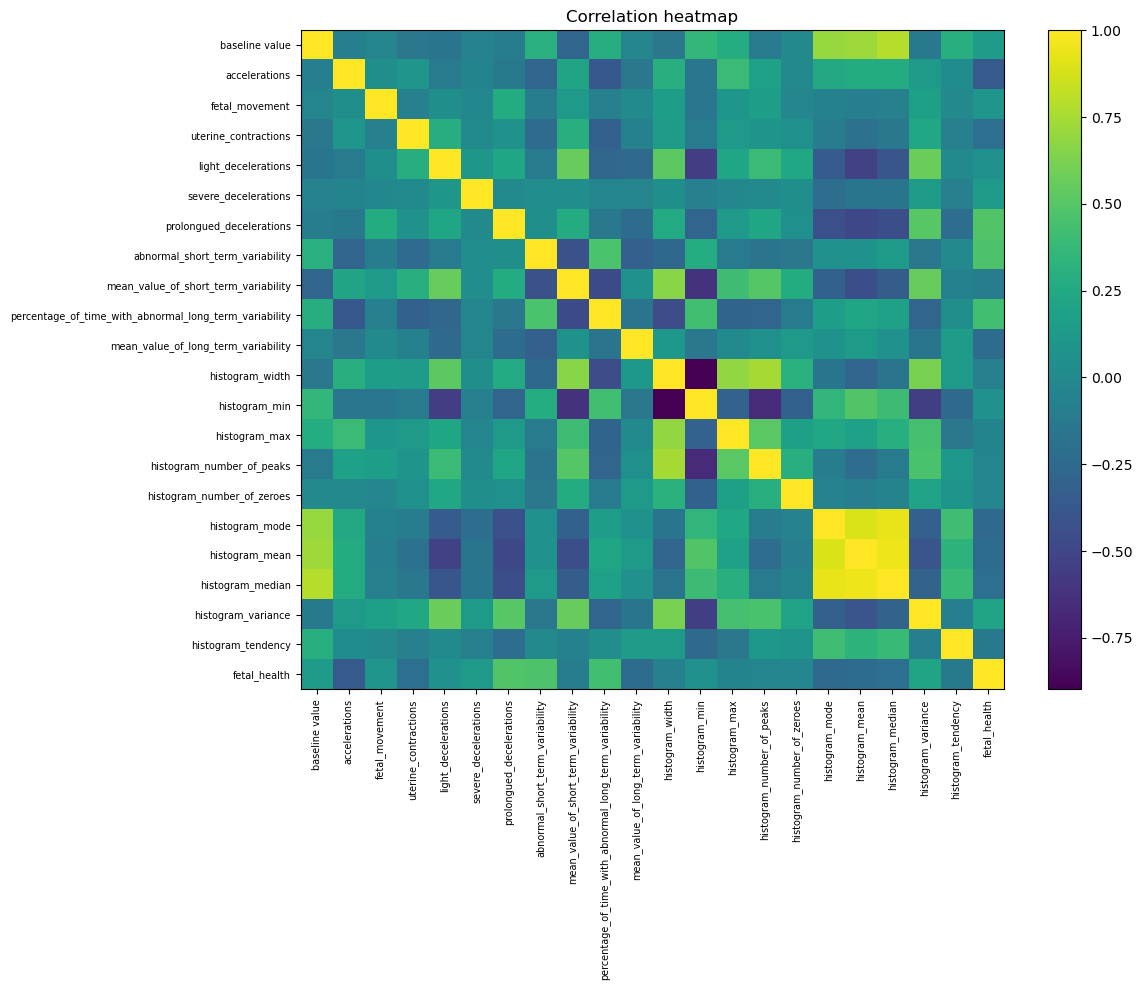

In [7]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Correlation heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=7)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=7)
plt.tight_layout()
plt.show()


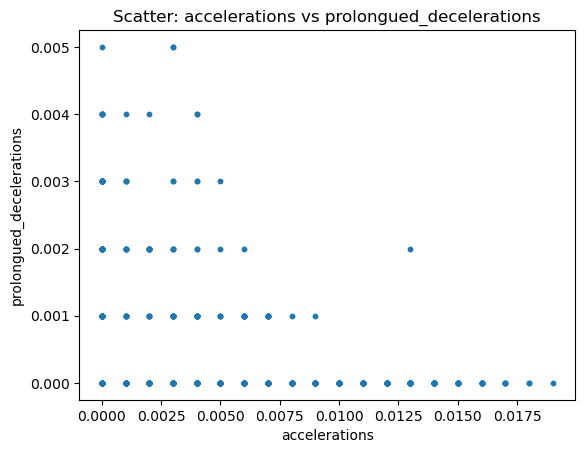

In [8]:
plt.figure()
plt.scatter(df["accelerations"], df["prolongued_decelerations"], s=10)
plt.title("Scatter: accelerations vs prolongued_decelerations")
plt.xlabel("accelerations")
plt.ylabel("prolongued_decelerations")
plt.show()

In [9]:
def iqr_outlier_counts(X_df):
    out = {}
    for col in X_df.columns:
        q1 = X_df[col].quantile(0.25)
        q3 = X_df[col].quantile(0.75)
        iqr = q3 - q1
        lo = q1 - 1.5 * iqr
        hi = q3 + 1.5 * iqr
        out[col] = int(((X_df[col] < lo) | (X_df[col] > hi)).sum())
    return pd.Series(out).sort_values(ascending=False)

out_counts = iqr_outlier_counts(X)
out_counts.head(10)

histogram_number_of_zeroes                                502
percentage_of_time_with_abnormal_long_term_variability    309
fetal_movement                                            307
histogram_variance                                        184
prolongued_decelerations                                  178
light_decelerations                                       150
histogram_mode                                             73
mean_value_of_long_term_variability                        71
mean_value_of_short_term_variability                       70
histogram_mean                                             45
dtype: int64

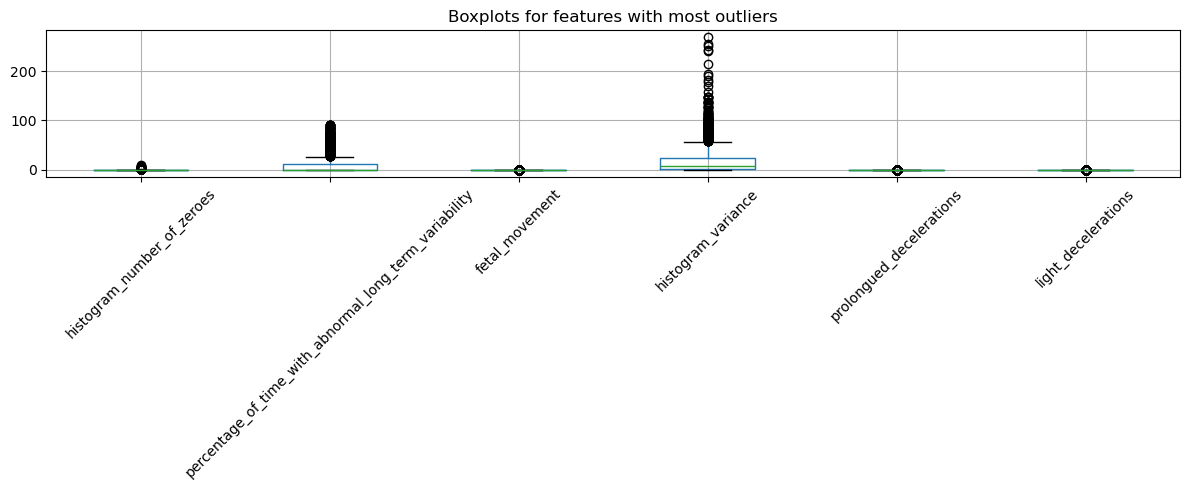

In [10]:
top_cols = out_counts.head(6).index.tolist()

plt.figure(figsize=(12, 5))
X[top_cols].boxplot(rot=45)
plt.title("Boxplots for features with most outliers")
plt.tight_layout()
plt.show()


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)

(1594, 21) (532, 21)


In [12]:
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

baseline = RandomForestClassifier(random_state=42)
scores = cross_val_score(baseline, X_train, y_train, cv=cv, scoring="accuracy")
print("CV accuracy mean:", scores.mean())
print("CV accuracy std:", scores.std())

CV accuracy mean: 0.9435500088720647
CV accuracy std: 0.012966716912929485


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ("qt", QuantileTransformer(output_distribution="normal", random_state=42)),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

scores = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring="accuracy")
print("LR pipeline CV mean:", scores.mean())
print("LR pipeline CV std:", scores.std())


LR pipeline CV mean: 0.85445279075728
LR pipeline CV std: 0.016191751141663924


In [14]:
from sklearn.preprocessing import PolynomialFeatures

pipe_poly = Pipeline([
    ("qt", QuantileTransformer(output_distribution="normal", random_state=42)),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler(with_mean=False)),
    ("model", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

scores = cross_val_score(pipe_poly, X_train, y_train, cv=cv, scoring="accuracy")
print("Poly LR CV mean:", scores.mean())
print("Poly LR CV std:", scores.std())

Poly LR CV mean: 0.08280988150864532
Poly LR CV std: 0.001496804695842877


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

selector_model = LogisticRegression(
    max_iter=5000,
    class_weight="balanced",
    solver="lbfgs"
)

rfe = RFE(estimator=selector_model, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

selected = X_train.columns[rfe.support_].tolist()
ranking = pd.Series(rfe.ranking_, index=X_train.columns).sort_values()

print("Selected features:", selected)
ranking.head(15)

Selected features: ['baseline value', 'accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance']


baseline value                                            1
accelerations                                             1
histogram_median                                          1
histogram_mean                                            1
prolongued_decelerations                                  1
abnormal_short_term_variability                           1
histogram_variance                                        1
histogram_mode                                            1
percentage_of_time_with_abnormal_long_term_variability    2
histogram_number_of_peaks                                 3
fetal_movement                                            4
mean_value_of_short_term_variability                      5
histogram_max                                             6
uterine_contractions                                      7
histogram_number_of_zeroes                                8
dtype: int64

In [17]:
X_train_sel = X_train[selected]
X_test_sel = X_test[selected]

pipe_lr_sel = Pipeline([
    ("qt", QuantileTransformer(output_distribution="normal", random_state=42)),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

scores = cross_val_score(pipe_lr_sel, X_train_sel, y_train, cv=cv, scoring="accuracy")
print("Selected feature LR CV mean:", scores.mean())
print("Selected feature LR CV std:", scores.std())

Selected feature LR CV mean: 0.836272944145423
Selected feature LR CV std: 0.01937613620015329


In [18]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid = GridSearchCV(
    rf,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)
best_rf = grid.best_estimator_

Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV score: 0.942925021194377


In [19]:
best_rf.fit(X_train, y_train)
pred = best_rf.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred, digits=3))

Test accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           1      0.943     0.964     0.953       414
           2      0.794     0.676     0.730        74
           3      0.891     0.932     0.911        44

    accuracy                          0.921       532
   macro avg      0.876     0.857     0.865       532
weighted avg      0.918     0.921     0.919       532



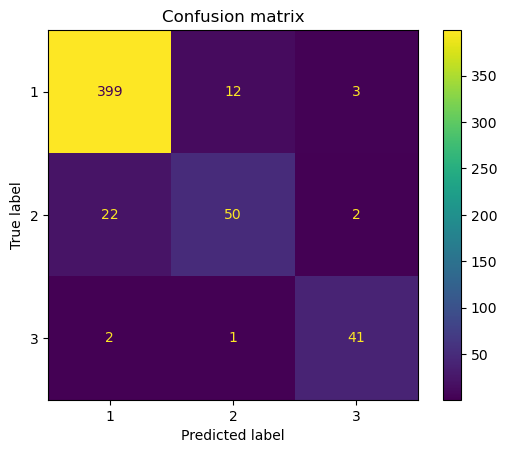

In [20]:
cm = confusion_matrix(y_test, pred, labels=sorted(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot()
plt.title("Confusion matrix")
plt.show()